In [ ]:
#url to dataset: https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
#need to download scikit in order for pickle to run on website
!pip install --user -U scikit-learn==1.0.2
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 30.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.13.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [2]:
data=pd.read_csv('customer_purchase_data.csv')

In [3]:
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [5]:
#cleaning data
data.rename(columns = {'DiscountsAvailed':'DiscountsAvailable'}, inplace=True)
data['AnnualIncome']=data['AnnualIncome'].round().astype(int)
data['TimeSpentOnWebsite']=data['TimeSpentOnWebsite'].round().astype(int)

In [6]:
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailable,PurchaseStatus
0,40,1,66120,8,0,31,0,5,1
1,20,1,23580,4,2,38,0,5,0
2,27,1,127821,11,2,32,1,0,1
3,24,1,137799,19,3,46,0,4,1
4,31,1,99301,19,1,20,0,0,1


In [7]:
data.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailable,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.148000,10.420000,2.012667,30.457333,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.494195,5.887391,1.428005,16.992803,0.469151,1.705152,0.49552
min,18.000000,0.000000,20002.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53029.000000,5.000000,1.000000,16.000000,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.500000,11.000000,2.000000,31.000000,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117168.000000,15.000000,3.000000,44.000000,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.000000,20.000000,4.000000,60.000000,1.000000,5.000000,1.00000


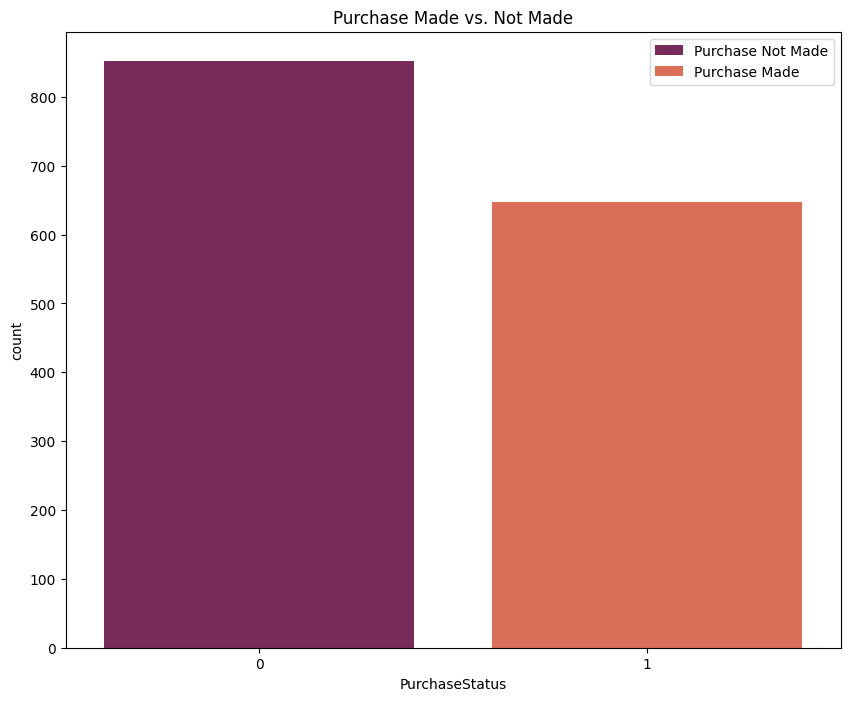

In [8]:
#0=Purchase Not Made, 1=Purchase Made
plt.figure(figsize=(10,8))
sns.countplot(x='PurchaseStatus', palette='rocket', hue='PurchaseStatus',data=data)
plt.title('Purchase Made vs. Not Made')
plt.legend(labels=['Purchase Not Made','Purchase Made'])
plt.show()

According to the graph above, there is more data available for purchase vs. not purchase. I need to clean the data and make sure both categories are equal.


In [9]:
samplesize=600
data=data.groupby('PurchaseStatus', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, samplesize, False),:])


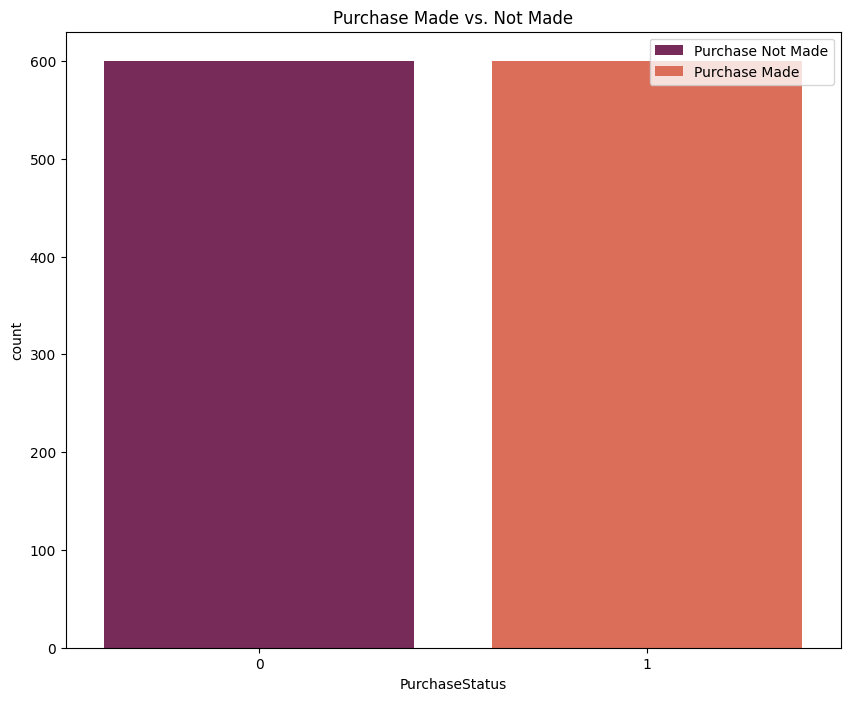

In [10]:
#adjusted
#0=Purchase Not Made, 1=Purchase Made
plt.figure(figsize=(10,8))
sns.countplot(x='PurchaseStatus', palette='rocket', hue='PurchaseStatus',data=data)
plt.title('Purchase Made vs. Not Made')
plt.legend(labels=['Purchase Not Made','Purchase Made'])
plt.show()

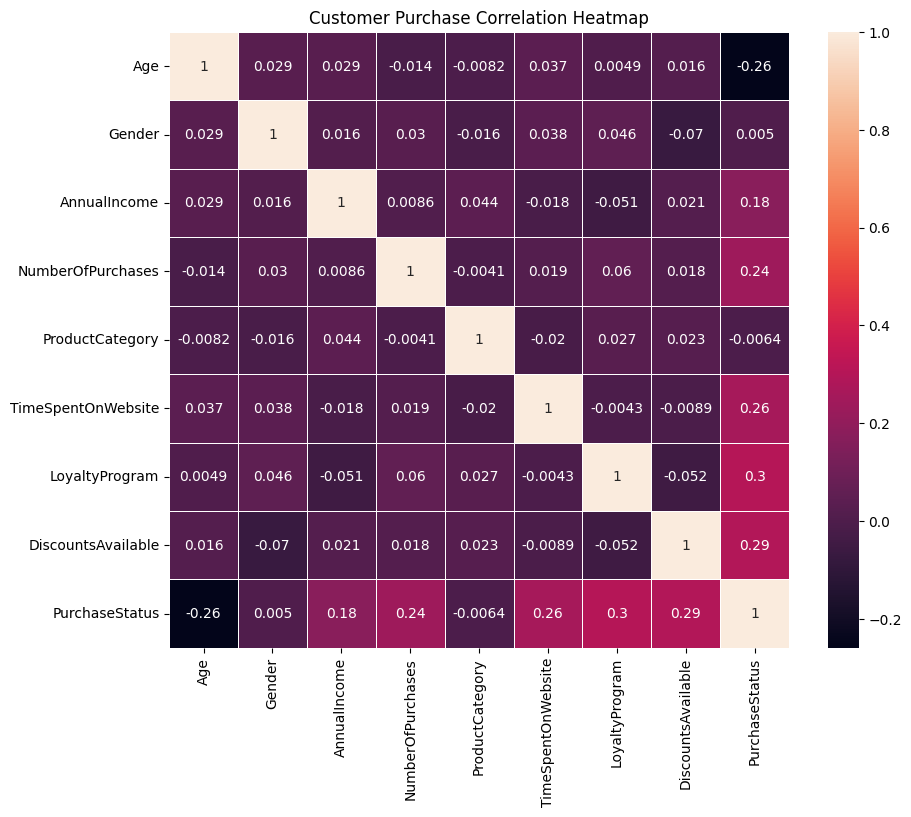

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='rocket', linewidth=0.5 )
plt.title('Customer Purchase Correlation Heatmap')
plt.show()

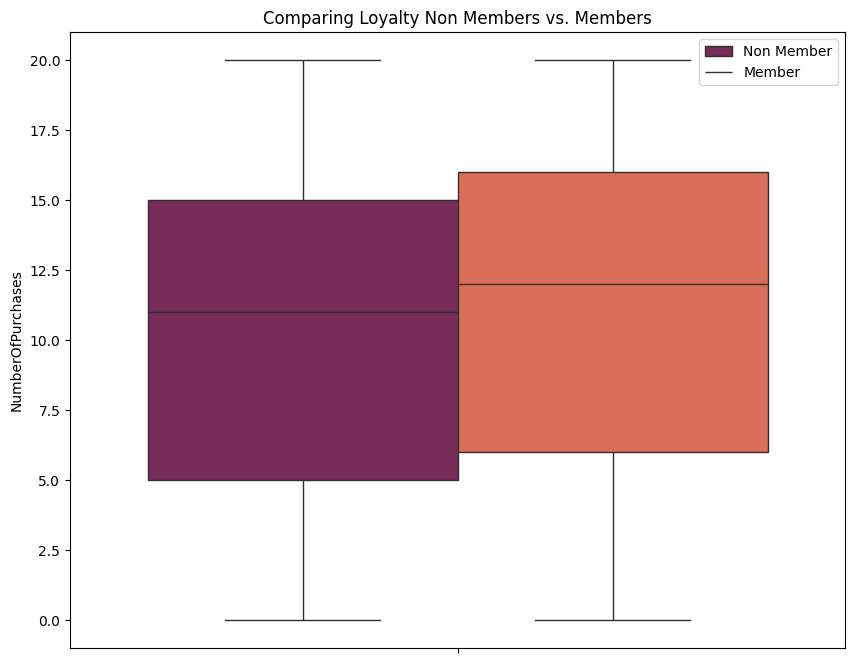

In [12]:
#Loyalty Program and Number of Purchase (on avg)
plt.figure(figsize=(10,8))
sns.boxplot(hue='LoyaltyProgram', y ='NumberOfPurchases', palette='rocket',data =data)
plt.legend(labels=['Non Member','Member'])
plt.title('Comparing Loyalty Non Members vs. Members')
plt.show()

In [13]:
#separating x and y for model
x=data.drop('PurchaseStatus', axis= 1)
x

Age  Gender  AnnualIncome  NumberOfPurchases  ProductCategory  \
0 1279   23       1         82526                  5                1   
  910    42       1        120508                 20                4   
  582    57       0        147208                  5                3   
  551    55       1        103262                 10                3   
  644    45       1        143075                  1                1   
...     ...     ...           ...                ...              ...   
1 139    39       0        126227                 19                2   
  546    37       0        102020                 18                2   
  408    50       0         32201                 16                2   
  835    23       1         68007                 18                0   
  854    42       1        100219                  7                3   

        TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailable  
0 1279                  44               0                   0  
  910                   27               0                   3  
  582                   42               0                   1  
  551                   42               0                   0  
  644                   42               0                   1  
...                    ...             ...                 ...  
1 139                   21               0                   3  
  546                   27               0                   5  
  408                   32               1                   3  
  835                   41               0                   4  
  854                   55               1                   3  

[1200 rows x 8 columns]

In [14]:
y=data['PurchaseStatus']
y.head()

0  1279    0
   910     0
   582     0
   551     0
   644     0
Name: PurchaseStatus, dtype: int64

In [15]:
#splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [16]:
#standardizing data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
#range of kvalues to test for optimal k value
k_range=range(1,100)
k_scores=[]

In [18]:
#stratified cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True)

#computing cross-validated accuracy for each k value
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_scaled, y_train, cv=cv, scoring='accuracy')
    k_scores.append(scores.mean())

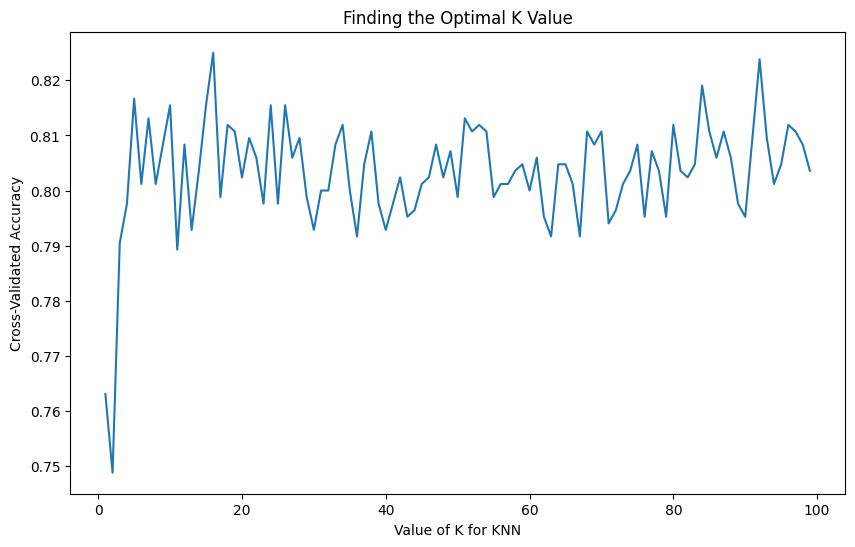

In [19]:
#plotting cross validation for k values

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding the Optimal K Value')
plt.show()

In [20]:
#finding the optimal k value
optimal_k = k_range[np.argmax(k_scores)]
print(f'The optimal k value is {optimal_k}')

The optimal k value is 16


In [21]:
#training model with different algorithms

#k-nearest neighbor model with the optimal k value
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(x_train_scaled, y_train)

#gaussian naive bayes model
gnb = GaussianNB()
gnb.fit(x_train_scaled,y_train)

#different support vector machine algorithms and parameters
linear=svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(x_train_scaled, y_train)
rbf=svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(x_train_scaled, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(x_train_scaled, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(x_train_scaled, y_train)

#decision tree model
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)

#random forest model
rf = RandomForestClassifier(n_estimators=10, criterion='gini')
rf.fit(x_train_scaled,y_train)

RandomForestClassifier(n_estimators=10)

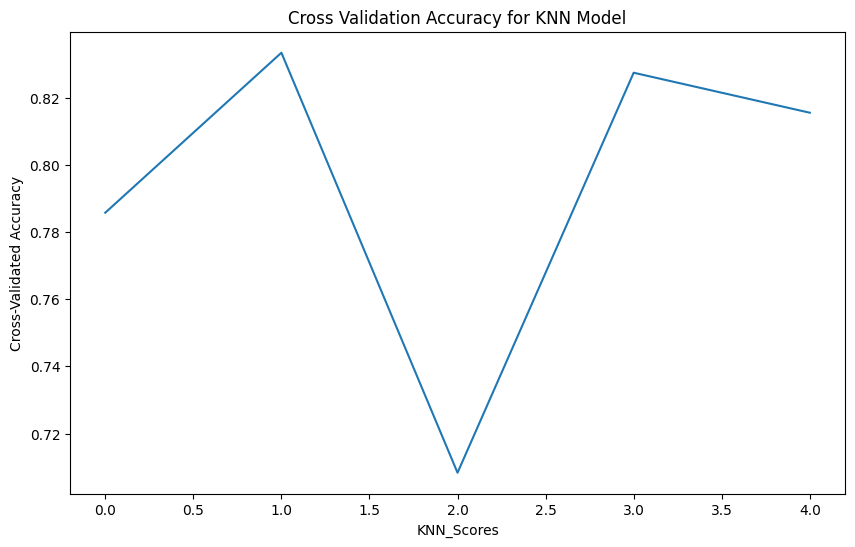

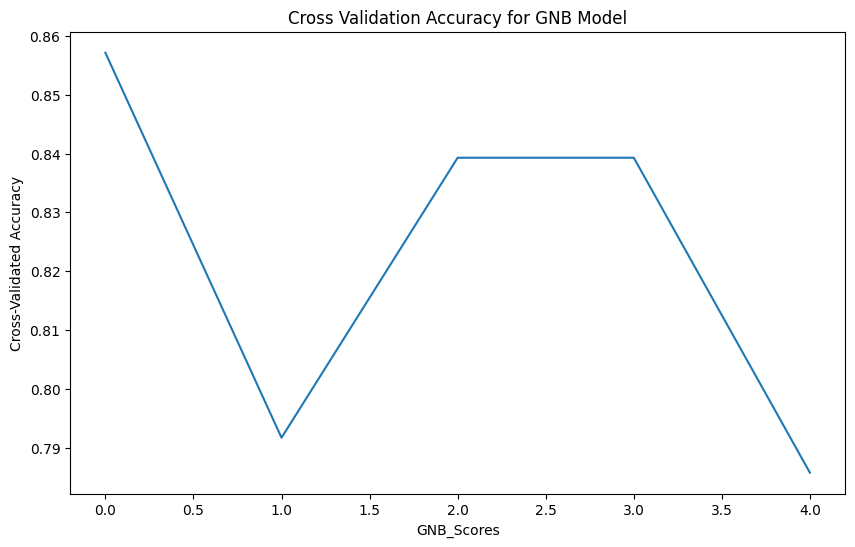

In [22]:
#stratified cross validation for each model
cv = StratifiedKFold(n_splits=5, shuffle=True)

#cross validation for knn model
knn_scores = cross_val_score(knn, x_train_scaled, y_train, cv=cv, scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(knn_scores)
plt.xlabel('KNN_Scores')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross Validation Accuracy for KNN Model')
plt.show()
print('\n')

#cross validation for gnb model
gnb_scores=cross_val_score(gnb, x_train_scaled, y_train, cv=cv, scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(gnb_scores)
plt.xlabel('GNB_Scores')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross Validation Accuracy for GNB Model')
plt.show()

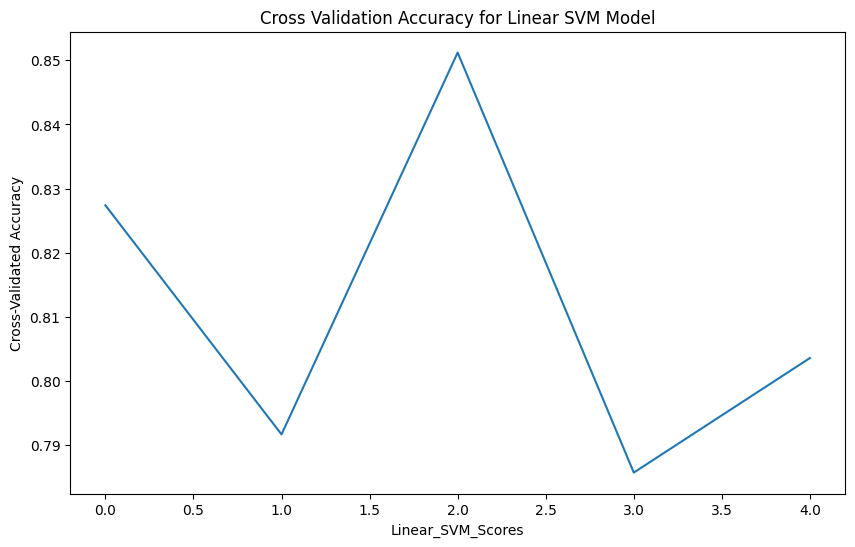

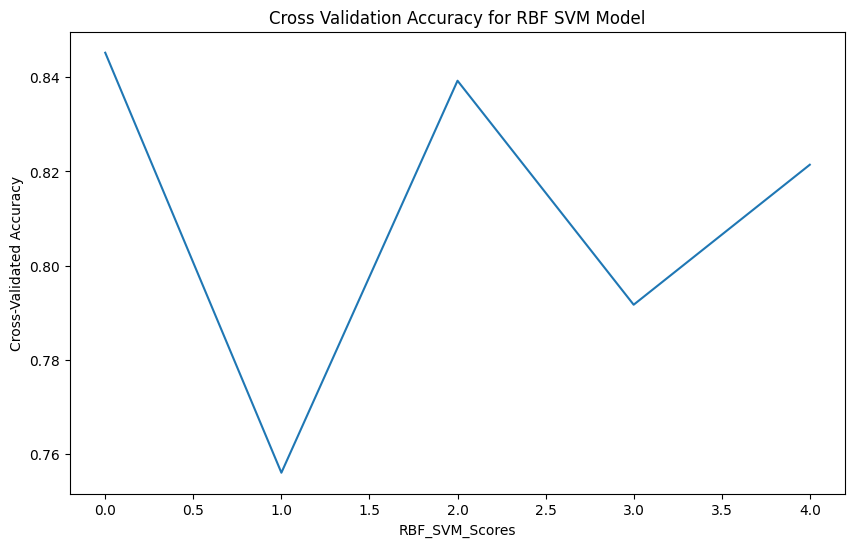

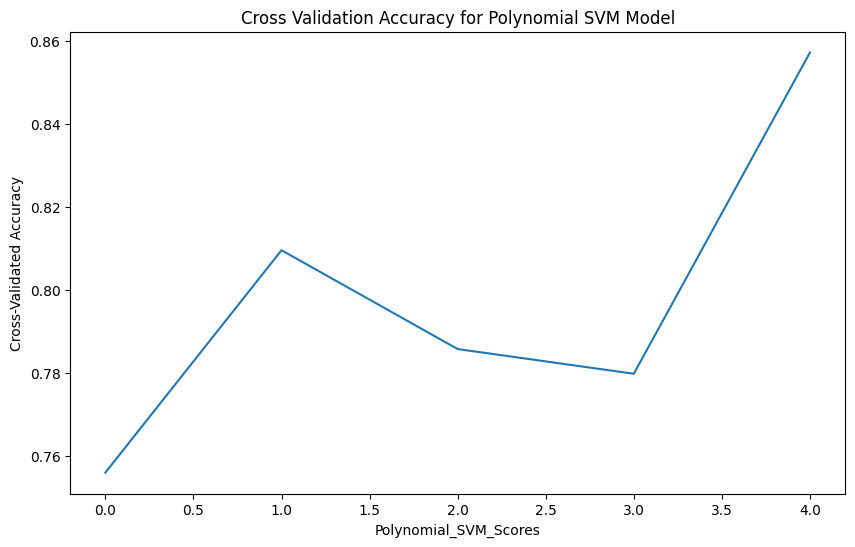

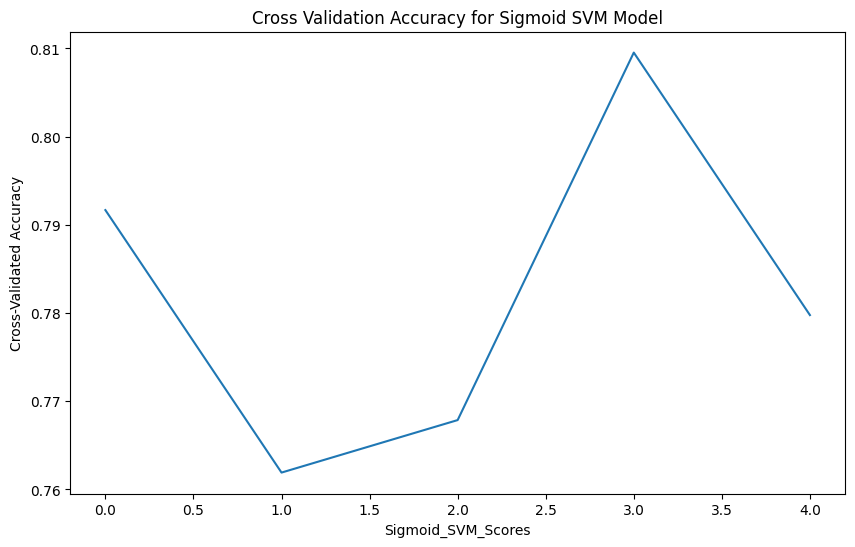

In [23]:
#cross validation for different svms

#linear support vector machine cross validation
linear_scores = cross_val_score(linear, x_train_scaled, y_train, cv=cv, scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(linear_scores)
plt.xlabel('Linear_SVM_Scores')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross Validation Accuracy for Linear SVM Model')
plt.show()
print('\n')

#radial basis function (rbf) support vector machine cross validation
rbf_scores = cross_val_score(rbf, x_train_scaled, y_train, cv=cv, scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(rbf_scores)
plt.xlabel('RBF_SVM_Scores')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross Validation Accuracy for RBF SVM Model')
plt.show()
print('\n')

#polynomial support vector machine cross validation
poly_scores = cross_val_score(poly, x_train_scaled, y_train, cv=cv, scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(poly_scores)
plt.xlabel('Polynomial_SVM_Scores')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross Validation Accuracy for Polynomial SVM Model')
plt.show()
print('\n')

#sigmoid support vector machine cross validation
sig_scores=cross_val_score(sig, x_train_scaled, y_train, cv=cv, scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(sig_scores)
plt.xlabel('Sigmoid_SVM_Scores')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross Validation Accuracy for Sigmoid SVM Model')
plt.show()
print('\n')

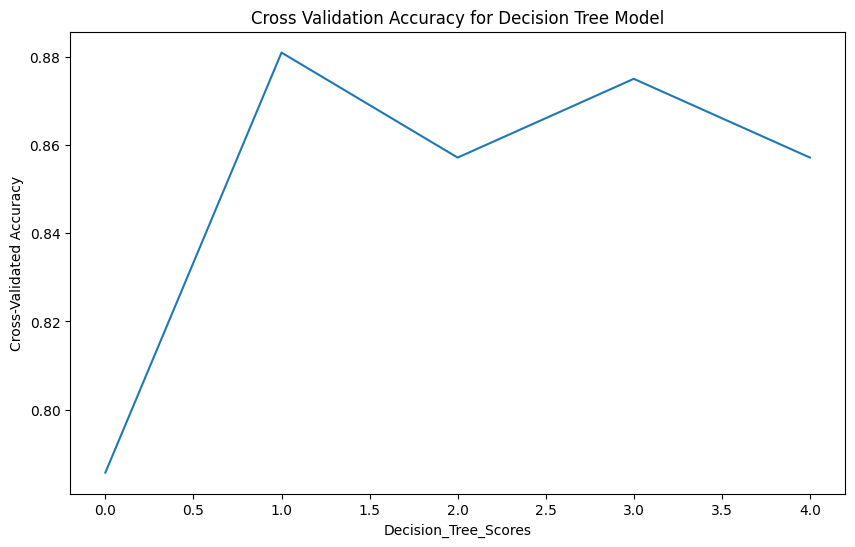

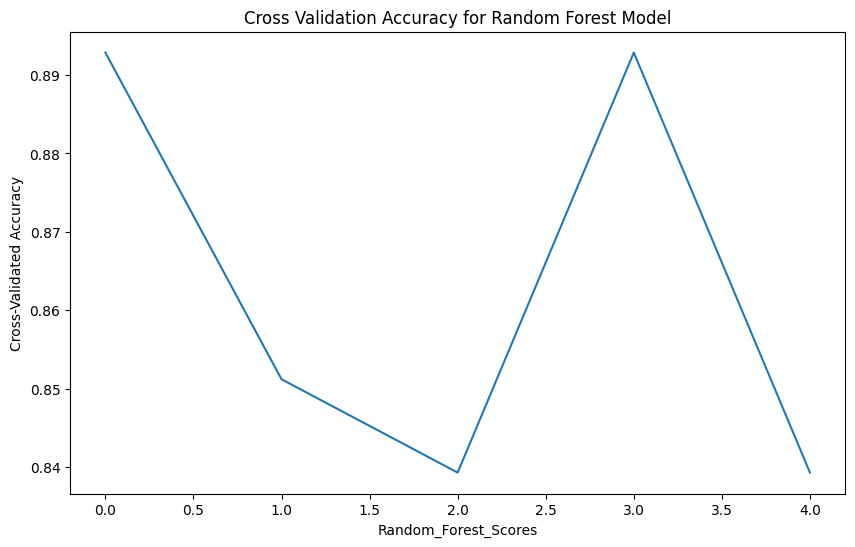

In [24]:
#decision tree
dt_scores=cross_val_score(dt, x_train_scaled, y_train, cv=cv, scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(dt_scores)
plt.xlabel('Decision_Tree_Scores')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross Validation Accuracy for Decision Tree Model')
plt.show()
print('\n')

#random forest
rf_scores=cross_val_score(rf, x_train_scaled, y_train, cv=cv, scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(rf_scores)
plt.xlabel('Random_Forest_Scores')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross Validation Accuracy for Random Forest Model')
plt.show()
print('\n')

In [25]:
#making predictions
y_knn_pred=knn.predict(x_test_scaled)
y_gnb_pred=gnb.predict(x_test_scaled)
y_linear_pred=linear.predict(x_test_scaled)
y_rbf_pred=rbf.predict(x_test_scaled)
y_poly_pred=poly.predict(x_test_scaled)
y_sig_pred=sig.predict(x_test_scaled)
y_dt_pred=dt.predict(x_test_scaled)
y_rf_pred=rf.predict(x_test_scaled)

In [26]:
print('classification report for knn model')
print(classification_report(y_test,y_knn_pred))
print('\n')
print('classification report for gnb model')
print(classification_report(y_test,y_gnb_pred))
print('\n')
print('classification report for linear svm model')
print(classification_report(y_test,y_linear_pred))
print('\n')
print('classification report for rbf svm model')
print(classification_report(y_test,y_rbf_pred))
print('\n')
print('classification report for poly svm model')
print(classification_report(y_test,y_poly_pred))
print('\n')
print('classification report for sig svm model')
print(classification_report(y_test,y_sig_pred))
print('\n')
print('classification report for dt model')
print(classification_report(y_test,y_dt_pred))
print('\n')
print('classification report for rf model')
print(classification_report(y_test,y_rf_pred))

classification report for knn model
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       174
           1       0.80      0.80      0.80       186

    accuracy                           0.79       360
   macro avg       0.79      0.79      0.79       360
weighted avg       0.79      0.79      0.79       360



classification report for gnb model
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       174
           1       0.83      0.82      0.82       186

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.82       360
weighted avg       0.82      0.82      0.82       360



classification report for linear svm model
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       174
           1       0.78      0.79      0.78       186

    accuracy                           0.78       360
   macro 

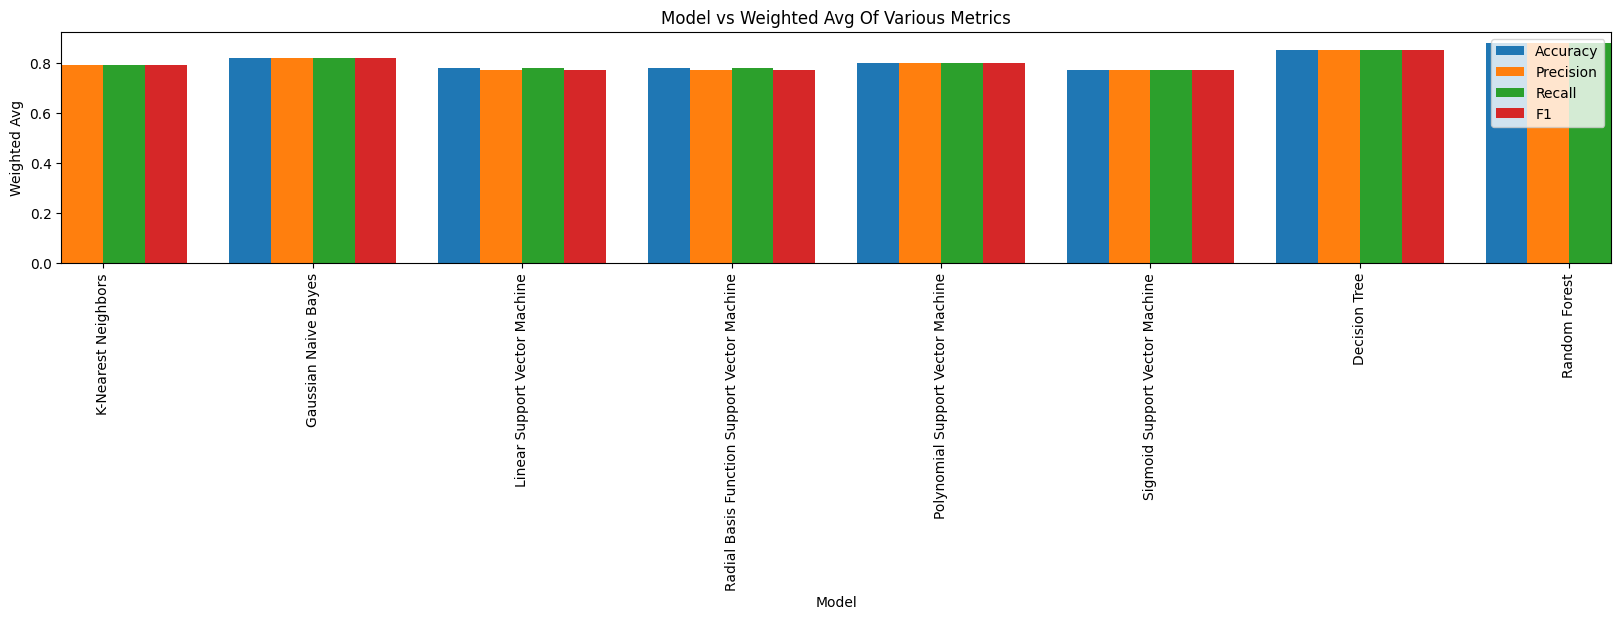

In [28]:
#Models
x = ['K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Linear Support Vector Machine','Radial Basis Function Support Vector Machine','Polynomial Support Vector Machine', 'Sigmoid Support Vector Machine','Decision Tree', 'Random Forest']

#collecting metrics from classification reports and creating lists
accuracy = [0.79,0.82,0.78,0.78,0.80,0.77,0.85,0.88]
precision = [0.79,0.82,0.77,0.77,0.80,0.77,0.85,0.88]
recall = [0.79,0.82,0.78,0.78,0.80,0.77,0.85,0.88]
f1 = [0.79,0.82,0.77,0.77,0.80,0.77,0.85,0.88]

# Number of bars
n_bars = len(x)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
x_axis = np.arange(len(x))

# Calculate the left positions for each individual bar within a group
left_positions = x_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(x_axis,x)
plt.xticks(rotation=90)
plt.xlim(min(x_axis) - bar_width, max(x_axis) + bar_width)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()


In [29]:
#creating user input function
def get_user_input():
    user_input={}

    user_input['Age']=int(input("What is the customer's age?:"))

    gender = input("What is the customer's gender?: ")
    user_input['Gender']= 1 if gender == 'Female' else 0
    user_input['AnnualIncome']=int(input("What is the customer's annual income? Enter answer without commas: "))
    user_input['NumberOfPurchases']=int(input("How many purchases were made by the customer?: "))

    category=input("Under what category was the purchase made?: ")
    user_input['ProductCategory']= 0 if category == 'Electronics' else 0
    user_input['ProductCategory']= 1 if category == 'Clothing' else 0
    user_input['ProductCategory']= 2 if category == 'Home Goods' else 0
    user_input['ProductCategory']= 3 if category == 'Beauty' else 0
    user_input['ProductCategory']= 4 if category == 'Sports' else 0

    user_input['TimeSpentOnWebsite']=int(input("What is the total time spent on the website? Write the answer in minutes: "))

    loyalty=input("Is the customer part of the loyalty program?: ")
    user_input['LoyaltyProgram'] = 1 if loyalty == 'Yes' else 0


    user_input['DiscountsAvailable']=int(input("What is the number of discounts available?: "))


    return pd.DataFrame(user_input, index=[0])

In [30]:
#creating prediction function based off user input
#model selected is random forest

def make_prediction(user_input):
  #scaling the data that the user entered
  user_input_scaled = scaler.transform(user_input)
  #making a prediction using the trained linear regression model
  prediction = rf.predict(user_input_scaled)
  #returning the prediction
  return prediction

In [32]:
#Collect User Input
user_input = get_user_input()

#Make a prediction
prediction = make_prediction(user_input)

#Display the result

purchase_prediction = 'Yes' if prediction == 1 else 'No'
print(f'Is the customer likely to make a purchase?: {purchase_prediction}')

What is the customer's age?:30
What is the customer's gender?: Female
What is the customer's annual income? Enter answer without commas: 100000
How many purchases were made by the customer?: 3
Under what category was the purchase made?: Clothing
What is the total time spent on the website? Write the answer in minutes: 35
Is the customer part of the loyalty program?: Yes
What is the number of discounts available?: 1
Is the customer likely to make a purchase?: Yes


In [33]:
#saving model & scaler to pickle

model_filename ='classification_model.pkl'
scaler_filename = 'classification_scaler.pkl'

with open(model_filename, 'wb') as model_file:
  pickle.dump(rf, model_file)

with open(scaler_filename, 'wb') as scaler_file:
  pickle.dump(scaler, scaler_file)